In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [3]:
#loading the data with pandas
df = pd.read_csv('set9_it1.csv')
df.head(1)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,100000.0,Meadowlands,Crystalhollow,1439.0,10260.0,sqft


## Cleaning data

In [4]:
# Checking for missing values
print(df.isna().sum())
# deleteing the rows with missing values 
df.dropna(inplace=True)


DI                  0
TradeValue          0
RealmType           0
Enclave             0
LivingQuarters    117
ParcelSize          0
ParcelSizeUnit      0
dtype: int64


In [5]:
# removes the duplicate rows in place
df.drop_duplicates(inplace=True)

- check for issues with types
- if ParcelSizeUnit is different we need to probably drop and then convert the ParcelSize so they have the same unit

In [6]:
# todo: decide what to do with this fact
df[['ParcelSizeUnit']].squeeze().unique()
# todo: Convert the ParcelSize sqm and drop the ParcelSizeUnit


array(['sqft', 'sqm'], dtype=object)

RealType and Enclave probably have typos


In [7]:
# Aparrently not this
print(df[['RealmType']].squeeze().unique())

# here we clearly have them and some things should be done about it 
len(sorted(df[['Enclave']].squeeze().unique()))

# Cleaning capitalisation 

# 

['Meadowlands' 'GnomeBurough' 'ArcaneMarket' 'AetherIsles'
 'CitadelQuarter']


40

# Data understanding

Finding min and max value for each numerical row

In [8]:
minTraveValue = df['TradeValue'].min()
maxTradeValue = df['TradeValue'].max()
print("TradeValue: max: " +  str(maxTradeValue) + " min: " +  str(minTraveValue))
print("LivingQuarters: max: " +  str(df['LivingQuarters'].max()) + " min: " +  str(df['LivingQuarters'].min()))
print("ParcelSize: max: " +  str(df['ParcelSize'].max()) + " min: " +  str(df['ParcelSize'].min()))

TradeValue: max: 755000.0 min: 113.5
LivingQuarters: max: 4339.0 min: 256.0
ParcelSize: max: 164660.0 min: -17671.0


Finding Mean, Median and mode for each row if applicable

In [9]:
print("mean: ")
print(df[['TradeValue','LivingQuarters','ParcelSize']].mean())
print('\n')

print('median: ')
print(df[['TradeValue','LivingQuarters','ParcelSize']].median())
print('\n')

print("mode for numerics: ")
print(df[['TradeValue','LivingQuarters','ParcelSize']].mode().squeeze())
print('\n')
print("mode for strings: ")
print(df[['RealmType','Enclave']].mode().squeeze())


mean: 
TradeValue        180889.207405
LivingQuarters      1153.986955
ParcelSize          9872.667907
dtype: float64


median: 
TradeValue        160000.0
LivingQuarters      1110.0
ParcelSize          9316.0
dtype: float64


mode for numerics: 
TradeValue        135000.0
LivingQuarters       664.0
ParcelSize          9600.0
Name: 0, dtype: float64


mode for strings: 
RealmType    Meadowlands
Enclave      Dragonspire
Name: 0, dtype: object


Distributions

- Calculate Variance
- Show the distirution using a bell cerve graph 
- Comment and show on the graph skewedness of the distribution


Outliers

- Detect Outliers by highlighing area on a histogram
- Detect Outliers by comparing it to 3 times the stardard devation 
- Detect Outliers by using 1.5 * IQR also put a box graph for this one so it's visual as well 
- After all that decide what to do with the outliers and provide reasons 

Visual Approach

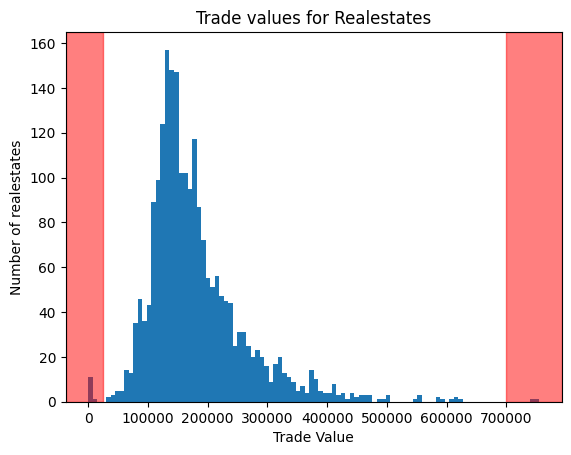

In [ ]:
# Show a histogram with a bucket size of 100
plt.hist(df['TradeValue'],100)
plt.title("Trade values for Realestates")
plt.xlabel("Trade Value")
plt.ylabel("Number of realestates")

xmin , xmax =  plt.xlim()
# Hightlight the outliners using spotted values
plt.axvspan(700000, xmax , color='red', alpha=0.5)
plt.axvspan(xmin, 25000 , color='red', alpha=0.5)
# Limit the graph to prevent dynamic correct of x axis
plt.xlim(xmin,xmax)
plt.show()



3 times standard diveation

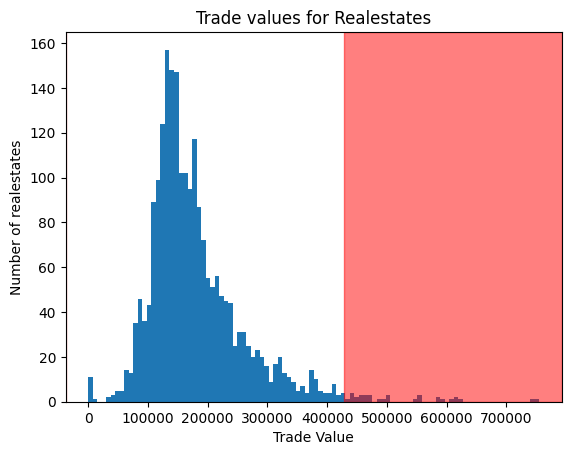

np.float64(-66195.47659773353)

In [ ]:
std = df['TradeValue'].std()
mean = df['TradeValue'].mean()

plt.hist(df['TradeValue'],100)
plt.title("Trade values for Realestates")
plt.xlabel("Trade Value")
plt.ylabel("Number of realestates")

xmin , xmax =  plt.xlim()
# Hightlight the outliners using spotted values
plt.axvspan(mean+3*std, xmax , color='red', alpha=0.5)
plt.axvspan(xmin, mean -3*std, color='red', alpha=0.5)
# Limit the graph to prevent dynamic correct of x axis
plt.xlim(xmin,xmax)
plt.show()


1.5 * IQR

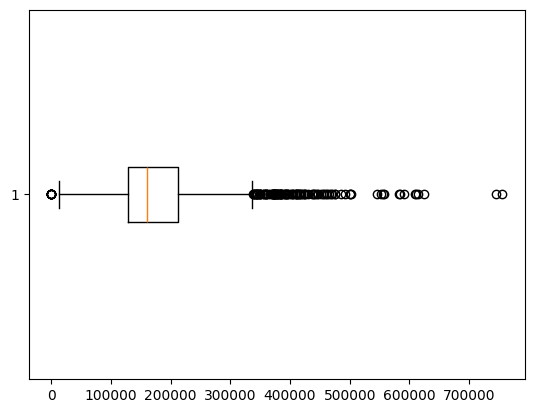

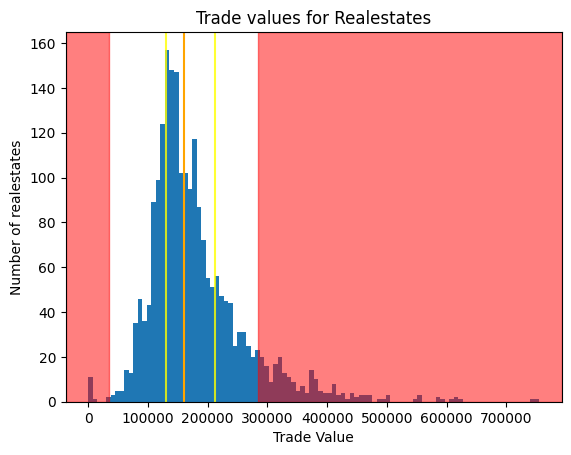

In [41]:

Q1 = df['TradeValue'].quantile(0.25)
Q3 = df['TradeValue'].quantile(0.75)
median = df['TradeValue'].quantile(0.5)
IQR = Q3 - Q1

plt.boxplot(df['TradeValue'],orientation='horizontal')
plt.show()


plt.hist(df['TradeValue'],100)
plt.title("Trade values for Realestates")
plt.xlabel("Trade Value")
plt.ylabel("Number of realestates")

xmin , xmax =  plt.xlim()
# Highlight the median with a line
plt.axvline(median , color='orange', alpha=1)
plt.axvline(Q1, color='yellow', alpha=0.8)
plt.axvline(Q3, color='yellow', alpha=0.8)

# Hightlight the outliners using spotted values
plt.axvspan(median+(IQR*1.5), xmax , color='red', alpha=0.5)
plt.axvspan(xmin, median-(IQR*1.5), color='red', alpha=0.5)
# Limit the graph to prevent dynamic correct of x axis
plt.xlim(xmin,xmax)
plt.show()


Scatter Graphs


- Create scatter graph to see colleration between LivingQuarters (X) and TradeValue (Y)
- Create scatter graph to see colleration between ParcelSize (X) and TradeValue  (Y)
- Describe each graph's trends


Benchmark models

- Split into Train and Testing sets 
- Calculate the mean or median of TradeValue 
- Calculate the MAE metric and MSE based on that  